# Notebook to select columns useful for SED fitting with CIGALE

### We will select the continuum from Laigle et al., 2015 + redshifts; emission lines from FMOS
### No need to have lines for the SED fitting but for the comparison

#### Photometry in mJy and emission line fluxes correcte dby apperture and in W/m$^2$

In [1]:
# Importing regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column, vstack

%matplotlib inline

# Data sets from CIGALE and FMOS-COSMOS

In [2]:
# # Metallicity binned sample
# data          = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format='fits')
# data          = data[:-1]

# data.sort('id')

# continuum_fit_1 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_1/results.fits', format = 'fits')
# continuum_fit_2 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_2/results.fits', format = 'fits')
# continuum_fit_3 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_3/results.fits', format = 'fits')
# continuum_fit_4 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_4/results.fits', format = 'fits')
# continuum_fit_5 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_5/results.fits', format = 'fits')

# continuum_fit_1 = continuum_fit_1[:-1]
# continuum_fit_2 = continuum_fit_2[:-1]
# continuum_fit_3 = continuum_fit_3[:-1]
# continuum_fit_4 = continuum_fit_4[:-1]
# continuum_fit_5 = continuum_fit_5[:-1]

# # Data from CIGALE fit in five z_gas bins
# continuum_fit = vstack([continuum_fit_1, continuum_fit_2, continuum_fit_3, continuum_fit_4, continuum_fit_5])
# continuum_fit.sort('id')

# print('Data in CIGALE output = %i'%len(continuum_fit))

# # Array with fluxes in mJy
# sample_z_cut  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info.fits', format='fits')
# sample_z_cut = sample_z_cut[(sample_z_cut['PHOTOZ_Laigle'] > 0)&(sample_z_cut['PHOTOZ_Laigle'] != 9.99)&(sample_z_cut['PHOTOZ_Laigle'] != -9999.99)]
# sample_z_cut.sort('id_Laigle')

# print('Data in CIGALE input = %i'%len(sample_z_cut))

# # # Array with H-band in magnitudes
# # sample_z_cut_mag     = sample[(sample['PHOTOZ'] > 0)&(sample['PHOTOZ'] != 9.99)&(sample['PHOTOZ'] != -9999.99)]
# # sample_z_cut_mag.sort('NUMBER')

# # Data for E(B-V) checks already with 2508 objects

# # continuum_ebv = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Ebv_att_checks_dic2021/out_ebvfactor_044/results.fits', format='fits')
# continuum_ebv = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Ebv_att_checks_dic2021/out_ebvfactor_free/results.fits', format='fits')

# print('Data in CIGALE output with free E(B-V) = %i'%len(continuum_ebv))

# data_ebv      = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/Ebv_att_checks_dic2021/'
#                            'COSMOS_FMOS_MOONS_2021_zCUT_BPT_attCheck.fits', format='fits')

# print('Data in CIGALE input with free E(B-V) = %i'%len(continuum_ebv))


In [3]:
data  = Table.read('/Users/lam/Desktop/files/COSMOS_FMOS_MOONS_2021.fits', format='fits')

sample_z_cut  = Table.read('/Users/lam/Desktop/files/sample_z_cut.fits', format='fits')
continuum_fit = Table.read('/Users/lam/Desktop/files/continuum_fit.fits', format='fits')

print('Data in CIGALE input = %i'%len(sample_z_cut))
print('Data in CIGALE output = %i'%len(continuum_fit))

data_ebv      = Table.read('/Users/lam/Desktop/files/COSMOS_FMOS_MOONS_2021_ebv.fits', format='fits')
continuum_ebv = Table.read('/Users/lam/Desktop/files/continuum_fit_ebv.fits', format='fits')

print('Data in CIGALE input with free E(B-V) = %i'%len(data_ebv))
print('Data in CIGALE output with free E(B-V) = %i'%len(continuum_ebv))

Data in CIGALE input = 2508
Data in CIGALE output = 2508
Data in CIGALE input with free E(B-V) = 2508
Data in CIGALE output with free E(B-V) = 2508


# H-band and H$\alpha$ checks

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10


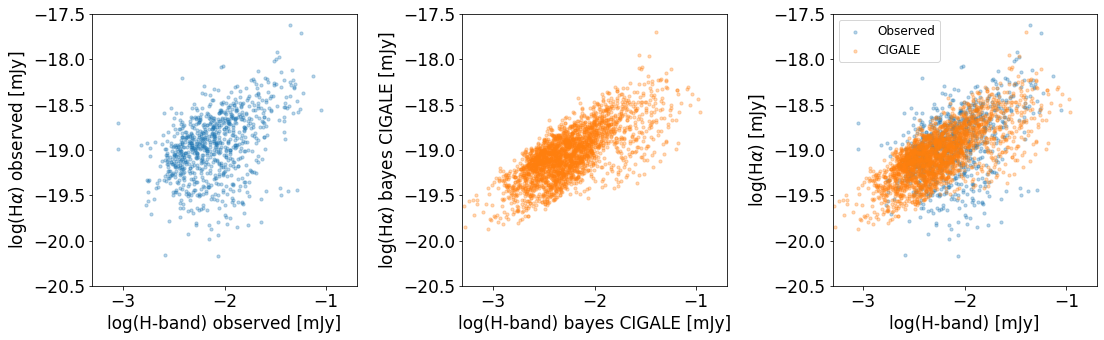

In [4]:
# Figure for the entire sample

fig, ((axA, axB, axC)) = plt.subplots(figsize=(18, 5), nrows=1, ncols=3, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.4, hspace=0.0)

axA.scatter(np.log10(sample_z_cut['cfht.wircam.H']), np.log10(sample_z_cut['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3)
axA.set_xlim(-3.3, -0.7)
axA.set_ylim(-20.5, -17.5)
axA.set_xlabel(r'log(H-band) observed [mJy]', fontsize = 17)
axA.set_ylabel(r'log(H$\alpha$) observed [mJy]', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(np.log10(continuum_fit['bayes.cfht.wircam.H']), np.log10(continuum_fit['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.set_xlim(-3.3, -0.7)
axB.set_ylim(-20.5, -17.5)
axB.set_xlabel(r'log(H-band) bayes CIGALE [mJy]', fontsize = 17)
axB.set_ylabel(r'log(H$\alpha$) bayes CIGALE [mJy]', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

axC.scatter(np.log10(sample_z_cut['cfht.wircam.H']), np.log10(sample_z_cut['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
axC.scatter(np.log10(continuum_fit['bayes.cfht.wircam.H']), np.log10(continuum_fit['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3, label = 'CIGALE')
axC.set_xlim(-3.3, -0.7)
axC.set_ylim(-20.5, -17.5)
axC.set_xlabel(r'log(H-band) [mJy]', fontsize = 17)
axC.set_ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 17)
axC.legend(loc = 'best', fontsize = 12)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy.png', dpi = 300, bbox_inches = 'tight')

In [5]:
# to select only those with valid Ha observed (fluxes larger than zero)

sample_z_cut_ha  = sample_z_cut[sample_z_cut['line.H-alpha'] > 0]
continuum_fit_ha = continuum_fit[np.where(sample_z_cut['line.H-alpha'] > 0)]

sample_z_cut_ha_ebv  = data_ebv[data_ebv['line.H-alpha'] > 0]
continuum_fit_ha_ebv = continuum_ebv[np.where(data_ebv['line.H-alpha'] > 0)]

print('Data with Ha flux > 0 = %i'%len(sample_z_cut_ha))

Data with Ha flux > 0 = 854


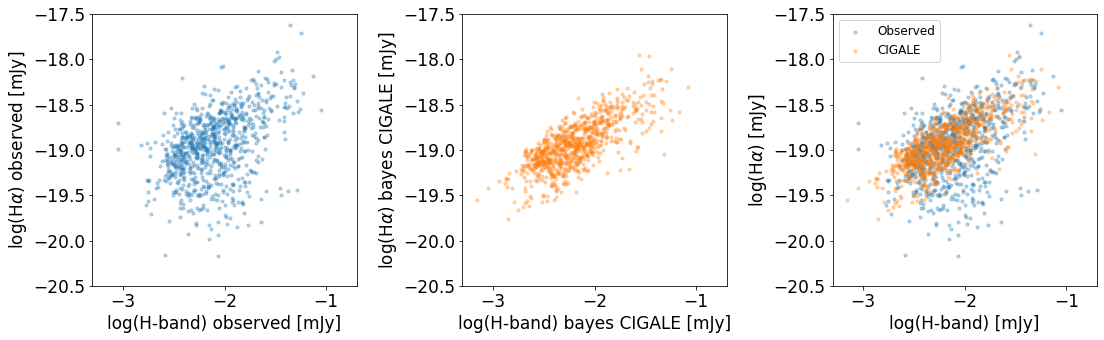

In [6]:
#Figure for the Ha SNR > 3 sample

fig, ((axA, axB, axC)) = plt.subplots(figsize=(18, 5), nrows=1, ncols=3, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.4, hspace=0.0)

axA.scatter(np.log10(sample_z_cut_ha['cfht.wircam.H']), np.log10(sample_z_cut_ha['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3)
axA.set_xlim(-3.3, -0.7)
axA.set_ylim(-20.5, -17.5)
axA.set_xlabel(r'log(H-band) observed [mJy]', fontsize = 17)
axA.set_ylabel(r'log(H$\alpha$) observed [mJy]', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(np.log10(continuum_fit_ha['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.set_xlim(-3.3, -0.7)
axB.set_ylim(-20.5, -17.5)
axB.set_xlabel(r'log(H-band) bayes CIGALE [mJy]', fontsize = 17)
axB.set_ylabel(r'log(H$\alpha$) bayes CIGALE [mJy]', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

axC.scatter(np.log10(sample_z_cut_ha['cfht.wircam.H']), np.log10(sample_z_cut_ha['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
axC.scatter(np.log10(continuum_fit_ha['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3, label = 'CIGALE')
axC.set_xlim(-3.3, -0.7)
axC.set_ylim(-20.5, -17.5)
axC.set_xlabel(r'log(H-band) [mJy]', fontsize = 17)
axC.set_ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 17)
axC.legend(loc = 'best', fontsize = 12)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy-HaSample.png', dpi = 300, bbox_inches = 'tight')

# SNR > 3 in H$\alpha$ selection

In [7]:
# to select only those with Ha observed and SNR > 3

sample_z_cut_ha_snr  = sample_z_cut[sample_z_cut['line.H-alpha']/sample_z_cut['line.H-alpha_err'] >= 3]
continuum_fit_ha_snr = continuum_fit[np.where(sample_z_cut['line.H-alpha']/sample_z_cut['line.H-alpha_err'] >= 3)]

sample_z_cut_ha_snr_ebv  = data_ebv[data_ebv['line.H-alpha']/data_ebv['line.H-alpha_err'] >= 3]
continuum_fit_ha_snr_ebv = continuum_ebv[np.where(data_ebv['line.H-alpha']/data_ebv['line.H-alpha_err'] >= 3)]

print('Data with Ha SNR > 3 > 0 = %i'%len(sample_z_cut_ha_snr))

Data with Ha SNR > 3 > 0 = 799


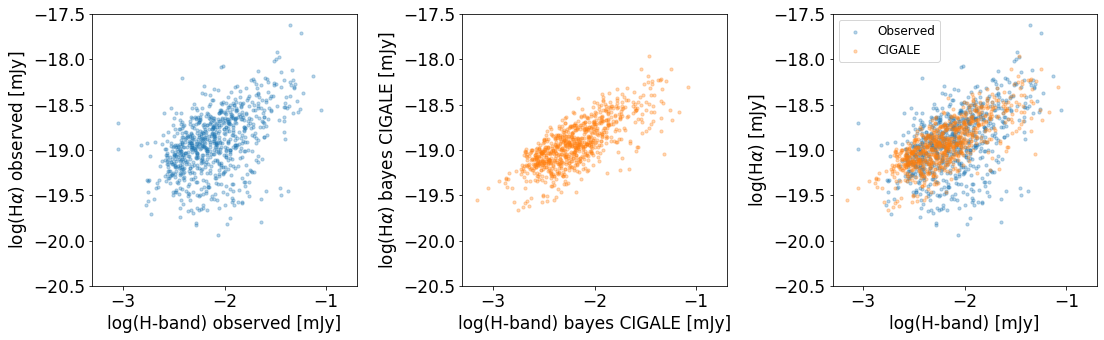

In [8]:
#Figure for the Ha SNR > 3 sample

fig, ((axA, axB, axC)) = plt.subplots(figsize=(18, 5), nrows=1, ncols=3, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.4, hspace=0.0)

axA.scatter(np.log10(sample_z_cut_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3)
axA.set_xlim(-3.3, -0.7)
axA.set_ylim(-20.5, -17.5)
axA.set_xlabel(r'log(H-band) observed [mJy]', fontsize = 17)
axA.set_ylabel(r'log(H$\alpha$) observed [mJy]', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha_snr['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.set_xlim(-3.3, -0.7)
axB.set_ylim(-20.5, -17.5)
axB.set_xlabel(r'log(H-band) bayes CIGALE [mJy]', fontsize = 17)
axB.set_ylabel(r'log(H$\alpha$) bayes CIGALE [mJy]', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

axC.scatter(np.log10(sample_z_cut_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
axC.scatter(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha_snr['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3, label = 'CIGALE')
axC.set_xlim(-3.3, -0.7)
axC.set_ylim(-20.5, -17.5)
axC.set_xlabel(r'log(H-band) [mJy]', fontsize = 17)
axC.set_ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 17)
axC.legend(loc = 'best', fontsize = 12)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy-HaSample.png', dpi = 300, bbox_inches = 'tight')

In [9]:
# Keeping the good ones 

mask_1   = continuum_fit_ha_snr['best.reduced_chi_square'] > 3

sample_z_cut_LOW_ha_snr  = sample_z_cut_ha_snr[np.where(mask_1)]
continuum_fit_LOW_ha_snr = continuum_fit_ha_snr[np.where(mask_1)]

mask_2   = sample_z_cut_LOW_ha_snr['line.H-alpha']/sample_z_cut_LOW_ha_snr['line.H-alpha_err'] < 5

sample_z_cut_LOW_ha_snr  = sample_z_cut_LOW_ha_snr[np.where(mask_2)]
continuum_fit_LOW_ha_snr = continuum_fit_LOW_ha_snr[np.where(mask_2)]

mask_3   = continuum_fit_ha_snr['best.reduced_chi_square'] <= 3

sample_z_cut_ha_snr  = sample_z_cut_ha_snr[np.where(mask_3)]
continuum_fit_ha_snr = continuum_fit_ha_snr[np.where(mask_3)]

mask_4   = sample_z_cut_ha_snr['line.H-alpha']/sample_z_cut_ha_snr['line.H-alpha_err'] >= 5

sample_z_cut_ha_snr  = sample_z_cut_ha_snr[np.where(mask_4)]
continuum_fit_ha_snr = continuum_fit_ha_snr[np.where(mask_4)]

print('Outliers = %i'%len(sample_z_cut_LOW_ha_snr))
print('Good sample = %i'%len(sample_z_cut_ha_snr))


Outliers = 33
Good sample = 583


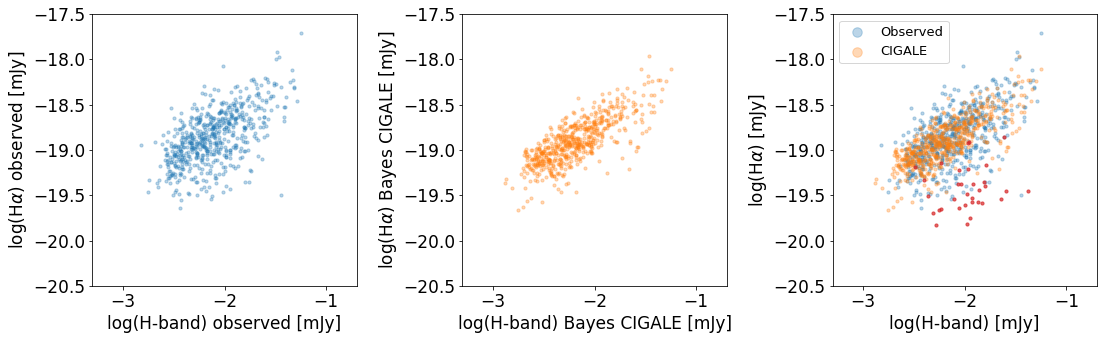

In [10]:
x = np.linspace(-4, -1, 100)

fig, ((axA, axB, axC)) = plt.subplots(figsize=(18, 5), nrows=1, ncols=3, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.4, hspace=0.0)

axA.scatter(np.log10(sample_z_cut_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3)
# axA.plot(x, 0.9*(x+3)-20)
axA.set_xlim(-3.3, -0.7)
axA.set_ylim(-20.5, -17.5)
axA.set_xlabel(r'log(H-band) observed [mJy]', fontsize = 17)
axA.set_ylabel(r'log(H$\alpha$) observed [mJy]', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha_snr['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.set_xlim(-3.3, -0.7)
axB.set_ylim(-20.5, -17.5)
axB.set_xlabel(r'log(H-band) Bayes CIGALE [mJy]', fontsize = 17)
axB.set_ylabel(r'log(H$\alpha$) Bayes CIGALE [mJy]', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

axC.scatter(np.log10(sample_z_cut_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
axC.scatter(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha_snr['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3, label = 'CIGALE')
# axC.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_LOW_ha_snr['bayes.line.H-alpha']),
#             s = 10, facecolors='C2', edgecolors='C2', alpha = 0.3, label = 'CIGALE')
axC.scatter(np.log10(sample_z_cut_LOW_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_LOW_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = '_nolegend_')
# axC.plot(x, 0.83*(x+3)-20)
# axC.plot(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), 0.9*(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H'])+3)-20)
axC.set_xlim(-3.3, -0.7)
axC.set_ylim(-20.5, -17.5)
axC.set_xlabel(r'log(H-band) [mJy]', fontsize = 17)
axC.set_ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 17)
axC.legend(loc = 'best', markerscale = 3, fontsize = 13)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy-HaSample-SNR.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/Users/lam/Desktop/fig1.png', dpi = 300, bbox_inches = 'tight')


In [11]:
x_H  = [sample_z_cut_LOW_ha_snr['cfht.wircam.H'], continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H']]
y_Ha = [sample_z_cut_LOW_ha_snr['line.H-alpha'], continuum_fit_LOW_ha_snr['bayes.line.H-alpha']]

mean_red_x    = np.median(sample_z_cut_LOW_ha_snr['cfht.wircam.H'])
mean_orange_x = np.median(continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H'])

mean_red_y    = np.median(sample_z_cut_LOW_ha_snr['line.H-alpha'])
mean_orange_y = np.median(continuum_fit_LOW_ha_snr['bayes.line.H-alpha'])

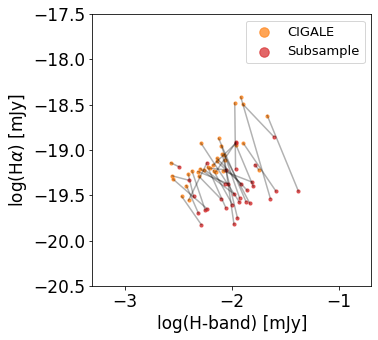

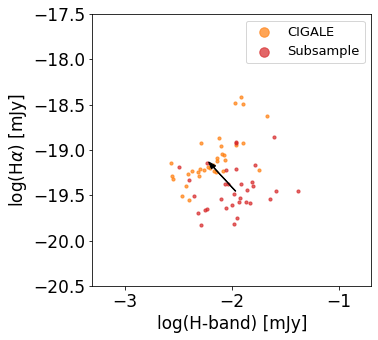

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_LOW_ha_snr['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.7, label = 'CIGALE')
plt.scatter(np.log10(sample_z_cut_LOW_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_LOW_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
plt.plot(np.log10(x_H), np.log10(y_Ha), color = 'k', alpha = 0.3, label = '_nolegend_')
plt.xlim(-3.3, -0.7)
plt.ylim(-20.5, -17.5)
plt.xlabel(r'log(H-band) [mJy]', fontsize = 17)
plt.ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy-HaSample-SNR.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/Users/lam/Desktop/fig1_1.png', dpi = 300, bbox_inches = 'tight')

# ------------------------

plt.figure(figsize=(5,5))
plt.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_LOW_ha_snr['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.7, label = 'CIGALE')
plt.scatter(np.log10(sample_z_cut_LOW_ha_snr['cfht.wircam.H']), np.log10(sample_z_cut_LOW_ha_snr['line.H-alpha']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(np.log10(x_H), np.log10(y_Ha), color = 'k', alpha = 0.3, label = '_nolegend_')
# plt.scatter(np.log10(mean_red_x), np.log10(mean_red_y))
# plt.scatter(np.log10(mean_orange_x), np.log10(mean_orange_y))
plt.arrow(np.log10(mean_red_x),  np.log10(mean_red_y), 
          np.log10(mean_orange_x)-np.log10(mean_red_x), np.log10(mean_orange_y)-np.log10(mean_red_y), 
          width = 0.005, head_width = 0.05, facecolor = 'k', edgecolor = 'k')
plt.xlim(-3.3, -0.7)
plt.ylim(-20.5, -17.5)
plt.xlabel(r'log(H-band) [mJy]', fontsize = 17)
plt.ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy-HaSample-SNR.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/Users/lam/Desktop/fig1_2.png', dpi = 300, bbox_inches = 'tight')


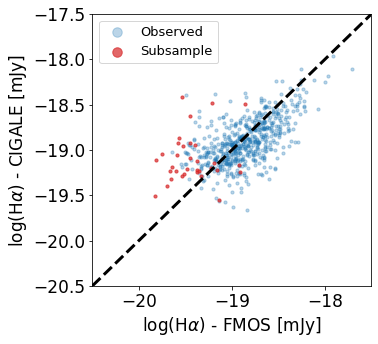

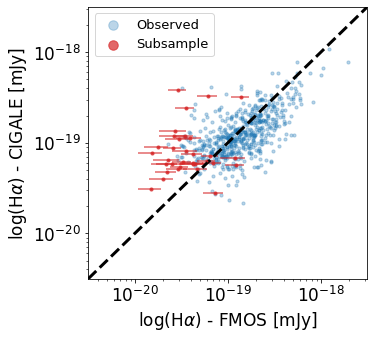

In [13]:
ha_line = np.linspace(-20.5, -17.5, 100)
h_line = np.linspace(-1.0, -3.0, 100)

plt.figure(figsize=(5,5))
plt.scatter(np.log10(sample_z_cut_ha_snr['line.H-alpha']), np.log10(continuum_fit_ha_snr['bayes.line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(np.log10(sample_z_cut_LOW_ha_snr['line.H-alpha']), np.log10(continuum_fit_LOW_ha_snr['bayes.line.H-alpha']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
plt.plot(ha_line, ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(-20.5, -17.5)
plt.ylim(-20.5, -17.5)
plt.xlabel(r'log(H$\alpha$) - FMOS [mJy]', fontsize = 17)
plt.ylabel(r'log(H$\alpha$) - CIGALE [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale =3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig2.png', dpi = 300, bbox_inches = 'tight')

plt.figure(figsize=(5,5))
plt.scatter(sample_z_cut_ha_snr['line.H-alpha'], continuum_fit_ha_snr['bayes.line.H-alpha'], 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(sample_z_cut_LOW_ha_snr['line.H-alpha'], continuum_fit_LOW_ha_snr['bayes.line.H-alpha'], 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
plt.errorbar(sample_z_cut_LOW_ha_snr['line.H-alpha'], continuum_fit_LOW_ha_snr['bayes.line.H-alpha'], 
            xerr = sample_z_cut_LOW_ha_snr['line.H-alpha_err'], fmt='o', ms = 1, c = 'C3', alpha = 0.7)
plt.plot(10**ha_line, 10**ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(10**-20.5, 10**-17.5)
plt.ylim(10**-20.5, 10**-17.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'log(H$\alpha$) - FMOS [mJy]', fontsize = 17)
plt.ylabel(r'log(H$\alpha$) - CIGALE [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig2.png', dpi = 300, bbox_inches = 'tight')


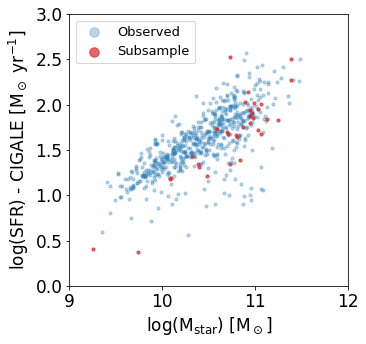

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(np.log10(continuum_fit_ha_snr['bayes.stellar.m_star']),
            np.log10(continuum_fit_ha_snr['bayes.sfh.sfr10Myrs']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.stellar.m_star']),
            np.log10(continuum_fit_LOW_ha_snr['bayes.sfh.sfr10Myrs']),
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(ha_line, ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(9, 12)
plt.ylim(0, 3)
plt.xlabel(r'log(M$_\mathrm{star}$) [M$_\odot$]', fontsize = 17)
plt.ylabel(r'log(SFR) - CIGALE [M$_\odot$ yr$^{-1}$]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig3.png', dpi = 300, bbox_inches = 'tight')

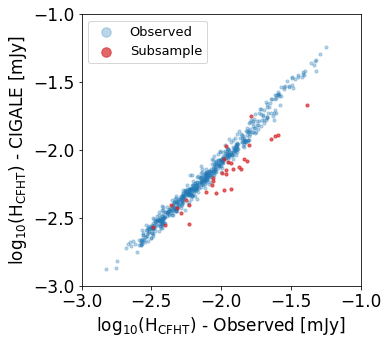

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(np.log10(sample_z_cut_ha_snr['cfht.wircam.H']), np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(np.log10(sample_z_cut_LOW_ha_snr['cfht.wircam.H']), np.log10(continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(h_line, h_line, lw = 3, ls = '--', c = 'k')
plt.xlim(-3.0, -1.0)
plt.ylim(-3.0, -1.0)
plt.xlabel(r'$\log_{10}(\mathrm{H}_\mathrm{CFHT})$ - Observed [mJy]', fontsize = 17)
plt.ylabel(r'$\log_{10}(\mathrm{H}_\mathrm{CFHT})$ - CIGALE [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig4.png', dpi = 300, bbox_inches = 'tight')

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


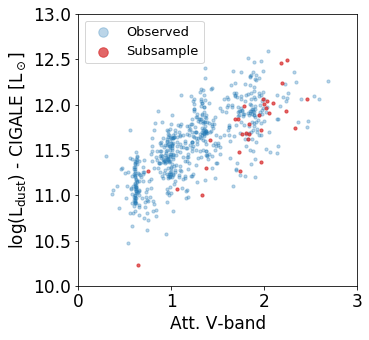

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(continuum_fit_ha_snr['bayes.attenuation.V_B90'],
            np.log10(continuum_fit_ha_snr['best.dust.luminosity']*2.61301e-27), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(continuum_fit_LOW_ha_snr['bayes.attenuation.V_B90'],
            np.log10(continuum_fit_LOW_ha_snr['best.dust.luminosity']*2.61301e-27),
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(ha_line, ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(0, 3)
plt.ylim(10, 13)
plt.xlabel(r'Att. V-band', fontsize = 17)
plt.ylabel(r'log($\mathrm{L_{dust}}$) - CIGALE [L$_\odot$]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig5.png', dpi = 300, bbox_inches = 'tight')


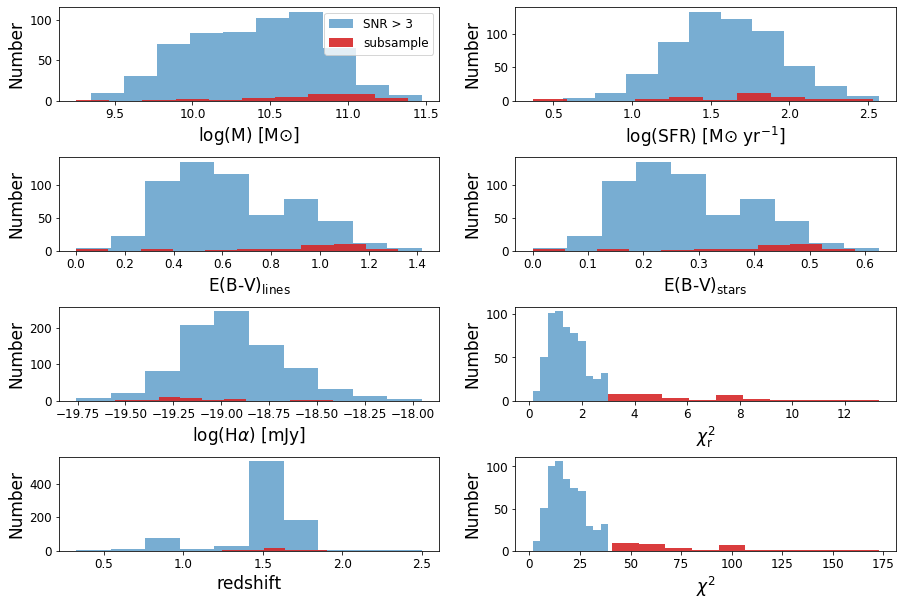

In [17]:
fig, ((axA, axB), (axC, axD),
      (axE, axF), (axG, axH)) = plt.subplots(figsize=(15, 10), nrows=4, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.2, hspace=0.6)

axA.hist(np.log10(continuum_fit_ha_snr['bayes.stellar.m_star']), alpha = 0.6, label = 'SNR > 3')
axA.hist(np.log10(continuum_fit_LOW_ha_snr['bayes.stellar.m_star']), alpha = 0.9, color = 'C3', label = 'subsample')
axA.set_xlabel(r'log(M) [M$\odot$]', fontsize = 17)
axA.set_ylabel(r'Number', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 12)
axA.legend(loc = 'best', fontsize = 12)

axB.hist(np.log10(continuum_fit_ha_snr['bayes.sfh.sfr']), alpha = 0.6)
axB.hist(np.log10(continuum_fit_LOW_ha_snr['bayes.sfh.sfr']), alpha = 0.9, color = 'C3')
axB.set_xlabel(r'log(SFR) [M$\odot$ yr$^{-1}$]', fontsize = 17)
axB.set_ylabel(r'Number', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 12)

axC.hist(continuum_fit_ha_snr['bayes.attenuation.E_BV_lines'], alpha = 0.6)
axC.hist(continuum_fit_LOW_ha_snr['bayes.attenuation.E_BV_lines'], alpha = 0.9, color = 'C3')
axC.set_xlabel(r'E(B-V)$_{\rm lines}$', fontsize = 17)
axC.set_ylabel(r'Number', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 12)

axD.hist(continuum_fit_ha_snr['bayes.attenuation.E_BVs'], alpha = 0.6)
axD.hist(continuum_fit_LOW_ha_snr['bayes.attenuation.E_BVs'], alpha = 0.9, color = 'C3')
axD.set_xlabel(r'E(B-V)$_{\rm stars}$', fontsize = 17)
axD.set_ylabel(r'Number', fontsize = 17)
axD.tick_params(axis = 'both', which = 'major', labelsize = 12)

axE.hist(np.log10(continuum_fit_ha['bayes.line.H-alpha']), alpha = 0.6)
axE.hist(np.log10(continuum_fit_LOW_ha_snr['bayes.line.H-alpha']), alpha = 0.9, color = 'C3')
axE.set_xlabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
axE.set_ylabel(r'Number', fontsize = 17)
axE.tick_params(axis = 'both', which = 'major', labelsize = 12)

axF.hist(continuum_fit_ha_snr['best.reduced_chi_square'], alpha = 0.6)
axF.hist(continuum_fit_LOW_ha_snr['best.reduced_chi_square'], alpha = 0.9, color = 'C3')
axF.set_xlabel(r'$\chi^2_\mathrm{r}$', fontsize = 17)
axF.set_ylabel(r'Number', fontsize = 17)
axF.tick_params(axis = 'both', which = 'major', labelsize = 12)

axG.hist(continuum_fit_ha['best.universe.redshift'], alpha = 0.6)
axG.hist(continuum_fit_LOW_ha_snr['best.universe.redshift'], alpha = 0.9, color = 'C3')
axG.set_xlabel(r'redshift', fontsize = 17)
axG.set_ylabel(r'Number', fontsize = 17)
axG.tick_params(axis = 'both', which = 'major', labelsize = 12)

axH.hist(continuum_fit_ha_snr['best.chi_square'], alpha = 0.6)
axH.hist(continuum_fit_LOW_ha_snr['best.chi_square'], alpha = 0.9, color = 'C3')
axH.set_xlabel(r'$\chi^2$', fontsize = 17)
axH.set_ylabel(r'Number', fontsize = 17)
axH.tick_params(axis = 'both', which = 'major', labelsize = 12)

# plt.savefig('/Users/lam/Desktop/Params-HaSample-SNR.png', dpi = 300, bbox_inches = 'tight')


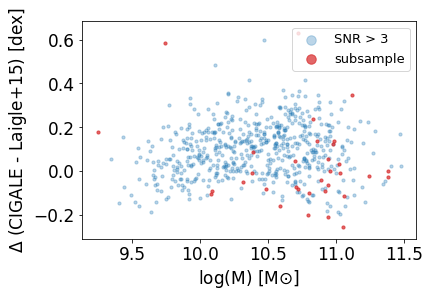

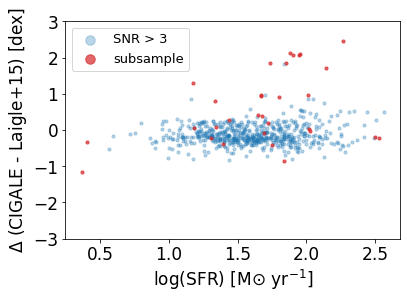

In [18]:
plt.figure()
plt.scatter(np.log10(continuum_fit_ha_snr['bayes.stellar.m_star']), 
            np.log10(continuum_fit_ha_snr['bayes.stellar.m_star'])-sample_z_cut_ha_snr['MASS_BEST'],
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'SNR > 3')
plt.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.stellar.m_star']), 
            np.log10(continuum_fit_LOW_ha_snr['bayes.stellar.m_star'])-sample_z_cut_LOW_ha_snr['MASS_BEST'],
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'subsample')
plt.xlabel(r'log(M) [M$\odot$]', fontsize = 17)
plt.ylabel(r'$\Delta$ (CIGALE - Laigle+15) [dex]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/M-star.png', dpi = 300, bbox_inches = 'tight')

plt.figure()
plt.scatter(np.log10(continuum_fit_ha_snr['bayes.sfh.sfr']), 
            np.log10(continuum_fit_ha_snr['bayes.sfh.sfr'])-sample_z_cut_ha_snr['SFR_BEST'],
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'SNR > 3')
plt.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.sfh.sfr']), 
            np.log10(continuum_fit_LOW_ha_snr['bayes.sfh.sfr'])-sample_z_cut_LOW_ha_snr['SFR_BEST'],
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'subsample')
plt.ylim(-3, 3)
plt.xlabel(r'log(SFR) [M$\odot$ yr$^{-1}$]', fontsize = 17)
plt.ylabel(r'$\Delta$ (CIGALE - Laigle+15) [dex]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/SFR.png', dpi = 300, bbox_inches = 'tight')


# Checks including H$\alpha$ and leaving E(B-V)$_\rm{factor}$ free in the fits

In [19]:
data  = Table.read('/Users/lam/Desktop/files/COSMOS_FMOS_MOONS_2021.fits', format='fits')

sample_z_cut  = Table.read('/Users/lam/Desktop/files/sample_z_cut.fits', format='fits')
continuum_fit = Table.read('/Users/lam/Desktop/files/continuum_fit.fits', format='fits')

print('Data in CIGALE input = %i'%len(sample_z_cut))
print('Data in CIGALE output = %i'%len(continuum_fit))

data_ebv      = Table.read('/Users/lam/Desktop/files/COSMOS_FMOS_MOONS_2021_ebv.fits', format='fits')
continuum_ebv = Table.read('/Users/lam/Desktop/files/continuum_fit_ebv.fits', format='fits')

print('Data in CIGALE input with free E(B-V) = %i'%len(data_ebv))
print('Data in CIGALE output with free E(B-V) = %i'%len(continuum_ebv))

Data in CIGALE input = 2508
Data in CIGALE output = 2508
Data in CIGALE input with free E(B-V) = 2508
Data in CIGALE output with free E(B-V) = 2508


In [20]:
# to select only those with valid Ha observed (fluxes larger than zero)

sample_z_cut_ha  = sample_z_cut[sample_z_cut['line.H-alpha'] > 0]
continuum_fit_ha = continuum_fit[np.where(sample_z_cut['line.H-alpha'] > 0)]

sample_z_cut_ha_ebv  = data_ebv[data_ebv['line.H-alpha'] > 0]
continuum_fit_ha_ebv = continuum_ebv[np.where(data_ebv['line.H-alpha'] > 0)]

print('Data with Ha flux > 0 = %i'%len(sample_z_cut_ha))

Data with Ha flux > 0 = 854


In [21]:
# to select only those with Ha observed and SNR > 3

sample_z_cut_ha_snr  = sample_z_cut[sample_z_cut['line.H-alpha']/sample_z_cut['line.H-alpha_err'] >= 3]
continuum_fit_ha_snr = continuum_fit[np.where(sample_z_cut['line.H-alpha']/sample_z_cut['line.H-alpha_err'] >= 3)]

sample_z_cut_ha_snr_ebv  = data_ebv[data_ebv['line.H-alpha']/data_ebv['line.H-alpha_err'] >= 3]
continuum_fit_ha_snr_ebv = continuum_ebv[np.where(data_ebv['line.H-alpha']/data_ebv['line.H-alpha_err'] >= 3)]

print('Data with Ha SNR > 3 > 0 = %i'%len(sample_z_cut_ha_snr))

Data with Ha SNR > 3 > 0 = 799


In [22]:
# Keeping the good ones 
# The masking is based on the fit with only continuum to select the same points shown before

mask_1   = continuum_fit_ha_snr['best.reduced_chi_square'] > 3

sample_z_cut_LOW_ha_snr_ebv  = sample_z_cut_ha_snr_ebv[np.where(mask_1)]
continuum_fit_LOW_ha_snr_ebv = continuum_fit_ha_snr_ebv[np.where(mask_1)]

mask_2   = sample_z_cut_LOW_ha_snr_ebv['line.H-alpha']/sample_z_cut_LOW_ha_snr_ebv['line.H-alpha_err'] < 5

sample_z_cut_LOW_ha_snr_ebv  = sample_z_cut_LOW_ha_snr_ebv[np.where(mask_2)]
continuum_fit_LOW_ha_snr_ebv = continuum_fit_LOW_ha_snr_ebv[np.where(mask_2)]

mask_3   = continuum_fit_ha_snr['best.reduced_chi_square'] <= 3

sample_z_cut_ha_snr_ebv  = sample_z_cut_ha_snr_ebv[np.where(mask_3)]
continuum_fit_ha_snr_ebv = continuum_fit_ha_snr_ebv[np.where(mask_3)]

mask_4   = sample_z_cut_ha_snr_ebv['line.H-alpha']/sample_z_cut_ha_snr_ebv['line.H-alpha_err'] >= 5

sample_z_cut_ha_snr_ebv  = sample_z_cut_ha_snr_ebv[np.where(mask_4)]
continuum_fit_ha_snr_ebv = continuum_fit_ha_snr_ebv[np.where(mask_4)]

print('Outliers = %i'%len(sample_z_cut_LOW_ha_snr_ebv))
print('Good sample = %i'%len(sample_z_cut_ha_snr_ebv))


Outliers = 33
Good sample = 583


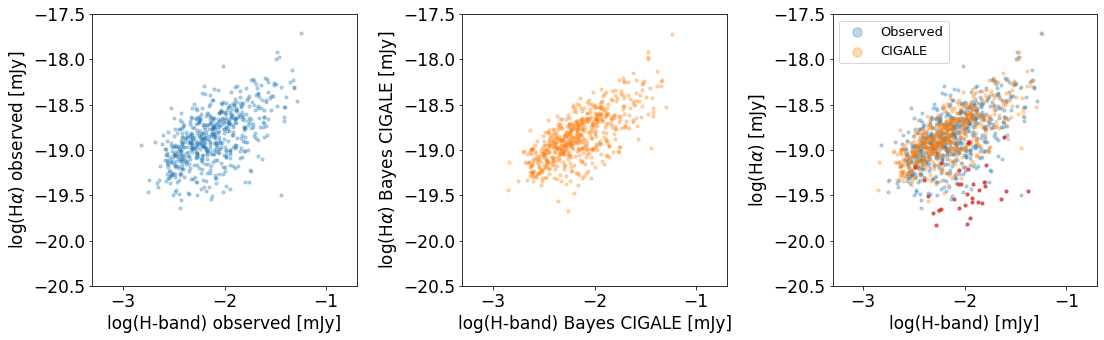

In [23]:
x = np.linspace(-4, -1, 100)

fig, ((axA, axB, axC)) = plt.subplots(figsize=(18, 5), nrows=1, ncols=3, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.4, hspace=0.0)

axA.scatter(np.log10(sample_z_cut_ha_snr_ebv['cfht.wircam.H']), np.log10(sample_z_cut_ha_snr_ebv['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3)
# axA.plot(x, 0.9*(x+3)-20)
axA.set_xlim(-3.3, -0.7)
axA.set_ylim(-20.5, -17.5)
axA.set_xlabel(r'log(H-band) observed [mJy]', fontsize = 17)
axA.set_ylabel(r'log(H$\alpha$) observed [mJy]', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(np.log10(continuum_fit_ha_snr_ebv['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha_snr_ebv['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.set_xlim(-3.3, -0.7)
axB.set_ylim(-20.5, -17.5)
axB.set_xlabel(r'log(H-band) Bayes CIGALE [mJy]', fontsize = 17)
axB.set_ylabel(r'log(H$\alpha$) Bayes CIGALE [mJy]', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

axC.scatter(np.log10(sample_z_cut_ha_snr_ebv['cfht.wircam.H']), np.log10(sample_z_cut_ha_snr_ebv['line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
axC.scatter(np.log10(continuum_fit_ha_snr_ebv['bayes.cfht.wircam.H']), np.log10(continuum_fit_ha_snr_ebv['bayes.line.H-alpha']),
            s = 10, facecolors='C1', edgecolors='C1', alpha = 0.3, label = 'CIGALE')
# axC.scatter(np.log10(continuum_fit_LOW_ha_snr['bayes.cfht.wircam.H']), np.log10(continuum_fit_LOW_ha_snr['bayes.line.H-alpha']),
#             s = 10, facecolors='C2', edgecolors='C2', alpha = 0.3, label = 'CIGALE')
axC.scatter(np.log10(sample_z_cut_LOW_ha_snr_ebv['cfht.wircam.H']), np.log10(sample_z_cut_LOW_ha_snr_ebv['line.H-alpha']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = '_nolegend_')
# axC.plot(x, 0.83*(x+3)-20)
# axC.plot(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H']), 0.9*(np.log10(continuum_fit_ha_snr['bayes.cfht.wircam.H'])+3)-20)
axC.set_xlim(-3.3, -0.7)
axC.set_ylim(-20.5, -17.5)
axC.set_xlabel(r'log(H-band) [mJy]', fontsize = 17)
axC.set_ylabel(r'log(H$\alpha$) [mJy]', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 17)
axC.legend(loc = 'best', markerscale = 3, fontsize = 13)

# plt.savefig('/Users/lam/Desktop/Hband-Ha-flux_mJy-HaSample-SNR.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('/Users/lam/Desktop/fig1_ContHa.png', dpi = 300, bbox_inches = 'tight')


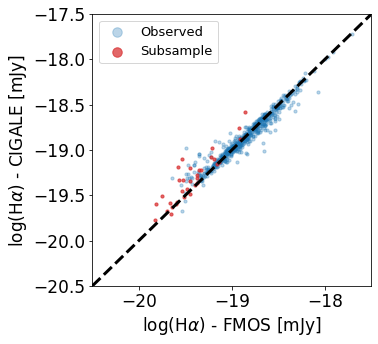

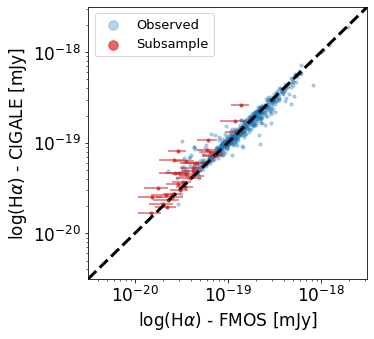

In [24]:
ha_line = np.linspace(-20.5, -17.5, 100)

plt.figure(figsize=(5,5))
plt.scatter(np.log10(sample_z_cut_ha_snr_ebv['line.H-alpha']), np.log10(continuum_fit_ha_snr_ebv['bayes.line.H-alpha']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(np.log10(sample_z_cut_LOW_ha_snr_ebv['line.H-alpha']), np.log10(continuum_fit_LOW_ha_snr_ebv['bayes.line.H-alpha']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
plt.plot(ha_line, ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(-20.5, -17.5)
plt.ylim(-20.5, -17.5)
plt.xlabel(r'log(H$\alpha$) - FMOS [mJy]', fontsize = 17)
plt.ylabel(r'log(H$\alpha$) - CIGALE [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig2.png', dpi = 300, bbox_inches = 'tight')

plt.figure(figsize=(5,5))
plt.scatter(sample_z_cut_ha_snr_ebv['line.H-alpha'], continuum_fit_ha_snr_ebv['bayes.line.H-alpha'], 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(sample_z_cut_LOW_ha_snr_ebv['line.H-alpha'], continuum_fit_LOW_ha_snr_ebv['bayes.line.H-alpha'], 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
plt.errorbar(sample_z_cut_LOW_ha_snr_ebv['line.H-alpha'], continuum_fit_LOW_ha_snr_ebv['bayes.line.H-alpha'], 
            xerr = sample_z_cut_LOW_ha_snr_ebv['line.H-alpha_err'], fmt='o', ms = 1, c = 'C3', alpha = 0.7)
plt.plot(10**ha_line, 10**ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(10**-20.5, 10**-17.5)
plt.ylim(10**-20.5, 10**-17.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'log(H$\alpha$) - FMOS [mJy]', fontsize = 17)
plt.ylabel(r'log(H$\alpha$) - CIGALE [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig2_ContHa.png', dpi = 300, bbox_inches = 'tight')



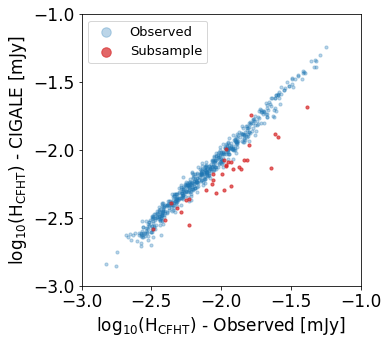

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(np.log10(sample_z_cut_ha_snr_ebv['cfht.wircam.H']), np.log10(continuum_fit_ha_snr_ebv['bayes.cfht.wircam.H']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(np.log10(sample_z_cut_LOW_ha_snr_ebv['cfht.wircam.H']), np.log10(continuum_fit_LOW_ha_snr_ebv['bayes.cfht.wircam.H']), 
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(h_line, h_line, lw = 3, ls = '--', c = 'k')
plt.xlim(-3.0, -1.0)
plt.ylim(-3.0, -1.0)
plt.xlabel(r'$\log_{10}(\mathrm{H}_\mathrm{CFHT})$ - Observed [mJy]', fontsize = 17)
plt.ylabel(r'$\log_{10}(\mathrm{H}_\mathrm{CFHT})$ - CIGALE [mJy]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig4_ContHa.png', dpi = 300, bbox_inches = 'tight')

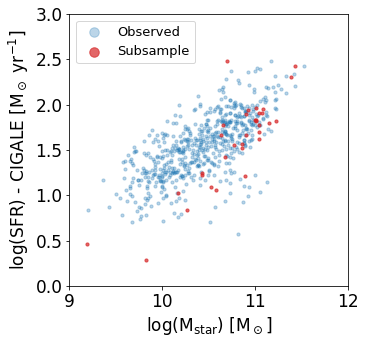

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(np.log10(continuum_fit_ha_snr_ebv['bayes.stellar.m_star']),
            np.log10(continuum_fit_ha_snr_ebv['bayes.sfh.sfr10Myrs']), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(np.log10(continuum_fit_LOW_ha_snr_ebv['bayes.stellar.m_star']),
            np.log10(continuum_fit_LOW_ha_snr_ebv['bayes.sfh.sfr10Myrs']),
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(ha_line, ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(9, 12)
plt.ylim(0, 3)
plt.xlabel(r'log(M$_\mathrm{star}$) [M$_\odot$]', fontsize = 17)
plt.ylabel(r'log(SFR) - CIGALE [M$_\odot$ yr$^{-1}$]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig3_ContHa.png', dpi = 300, bbox_inches = 'tight')


/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


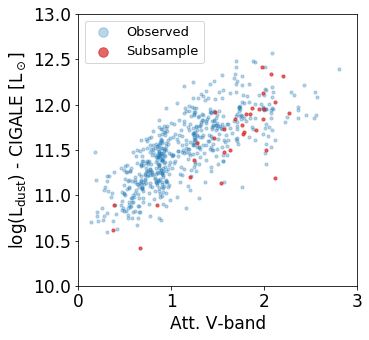

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(continuum_fit_ha_snr_ebv['bayes.attenuation.V_B90'],
            np.log10(continuum_fit_ha_snr_ebv['best.dust.luminosity']*2.61301e-27), 
            s = 10, facecolors='C0', edgecolors='C0', alpha = 0.3, label = 'Observed')
plt.scatter(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.V_B90'],
            np.log10(continuum_fit_LOW_ha_snr_ebv['best.dust.luminosity']*2.61301e-27),
            s = 10, facecolors='C3', edgecolors='C3', alpha = 0.7, label = 'Subsample')
# plt.plot(ha_line, ha_line, lw = 3, ls = '--', c = 'k')
plt.xlim(0, 3)
plt.ylim(10, 13)
plt.xlabel(r'Att. V-band', fontsize = 17)
plt.ylabel(r'log($\mathrm{L_{dust}}$) - CIGALE [L$_\odot$]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc = 'best', markerscale = 3, fontsize = 13)
# plt.savefig('/Users/lam/Desktop/fig5_ebv.png', dpi = 300, bbox_inches = 'tight')


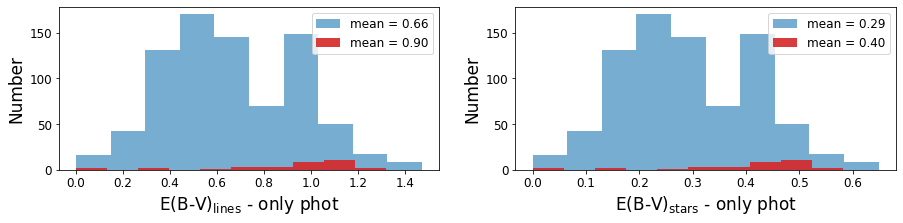

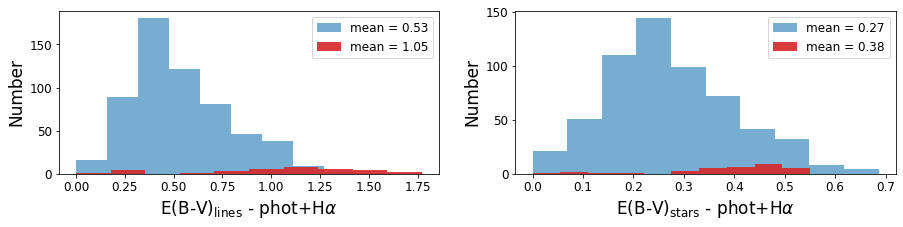

In [28]:
fig, ((axC, axD)) = plt.subplots(figsize=(15, 3), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.2, hspace=0.6)

axC.hist(continuum_fit_ha_snr['bayes.attenuation.E_BV_lines'], alpha = 0.6, 
         label = r'mean = %.2f'%np.mean(continuum_fit_ha_snr['bayes.attenuation.E_BV_lines']))
axC.hist(continuum_fit_LOW_ha_snr['bayes.attenuation.E_BV_lines'], alpha = 0.9, color = 'C3', 
         label = r'mean = %.2f'%np.mean(continuum_fit_LOW_ha_snr['bayes.attenuation.E_BV_lines']))
axC.set_xlabel(r'E(B-V)$_{\rm lines}$ - only phot', fontsize = 17)
axC.set_ylabel(r'Number', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 12)
axC.legend(loc = 'best', fontsize = 12)

axD.hist(continuum_fit_ha_snr['bayes.attenuation.E_BVs'], alpha = 0.6, 
         label = r'mean = %.2f'%np.mean(continuum_fit_ha_snr['bayes.attenuation.E_BVs']))
axD.hist(continuum_fit_LOW_ha_snr['bayes.attenuation.E_BVs'], alpha = 0.9, color = 'C3', 
         label = r'mean = %.2f'%np.mean(continuum_fit_LOW_ha_snr['bayes.attenuation.E_BVs']))
axD.set_xlabel(r'E(B-V)$_{\rm stars}$ - only phot', fontsize = 17)
axD.set_ylabel(r'Number', fontsize = 17)
axD.tick_params(axis = 'both', which = 'major', labelsize = 12)
axD.legend(loc = 'best', fontsize = 12)

#---------------------------------------

fig, ((axC, axD)) = plt.subplots(figsize=(15, 3), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.2, hspace=0.6)

axC.hist(continuum_fit_ha_snr_ebv['bayes.attenuation.E_BV_lines'], alpha = 0.6, 
         label = r'mean = %.2f'%np.mean(continuum_fit_ha_snr_ebv['bayes.attenuation.E_BV_lines']))
axC.hist(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.E_BV_lines'], alpha = 0.9, color = 'C3', 
         label = r'mean = %.2f'%np.mean(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.E_BV_lines']))
axC.set_xlabel(r'E(B-V)$_{\rm lines}$ - phot+H$\alpha$', fontsize = 17)
axC.set_ylabel(r'Number', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 12)
axC.legend(loc = 'best', fontsize = 12)

axD.hist(continuum_fit_ha_snr_ebv['bayes.attenuation.E_BVs'], alpha = 0.6, 
         label = r'mean = %.2f'%np.mean(continuum_fit_ha_snr_ebv['bayes.attenuation.E_BVs']))
axD.hist(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.E_BVs'], alpha = 0.9, color = 'C3', 
         label = r'mean = %.2f'%np.mean(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.E_BVs']))
axD.set_xlabel(r'E(B-V)$_{\rm stars}$ - phot+H$\alpha$', fontsize = 17)
axD.set_ylabel(r'Number', fontsize = 17)
axD.tick_params(axis = 'both', which = 'major', labelsize = 12)
axD.legend(loc = 'best', fontsize = 12)

# plt.savefig('/Users/lam/Desktop/Params-comparison.png', dpi = 300, bbox_inches = 'tight')


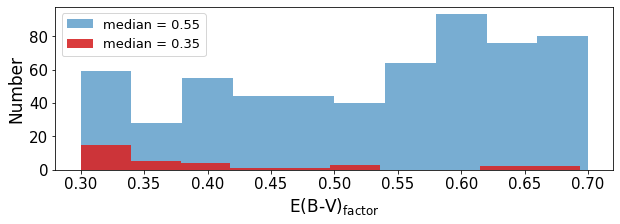

In [29]:
fig, ((axC)) = plt.subplots(figsize=(10, 3), nrows=1, ncols=1, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.2, hspace=0.6)

axC.hist(continuum_fit_ha_snr_ebv['bayes.attenuation.E_BV_factor'], alpha = 0.6,  
         label = r'median = %.2f'%np.median(continuum_fit_ha_snr_ebv['bayes.attenuation.E_BV_factor']))
axC.hist(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.E_BV_factor'], color = 'C3', alpha = 0.9,  
         label = r'median = %.2f'%np.median(continuum_fit_LOW_ha_snr_ebv['bayes.attenuation.E_BV_factor']))
axC.set_xlabel(r'E(B-V)$_{\rm factor}$', fontsize = 17)
axC.set_ylabel(r'Number', fontsize = 17)
axC.tick_params(axis = 'both', which = 'major', labelsize = 15)
axC.legend(loc = 'best', markerscale = 3, fontsize = 13)

# plt.savefig('/Users/lam/Desktop/Params-Ebv_factor.png', dpi = 300, bbox_inches = 'tight')
